In [13]:
import os
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [28]:
#加速度数据和位移数据
acceleration = pd.read_csv('D:\管片加速度积分\训练数据\加速度数据/e45f011999beVK_20240311-070340.csv').iloc[:,0]
displacement = pd.read_csv('D:\管片加速度积分\训练数据\位移数据/e45f011999be_20240311-070344.csv').iloc[:,0]
distance = (displacement-displacement[:1000].mean(axis=0))*0.001

TypeError: imshow() missing 1 required positional argument: 'X'

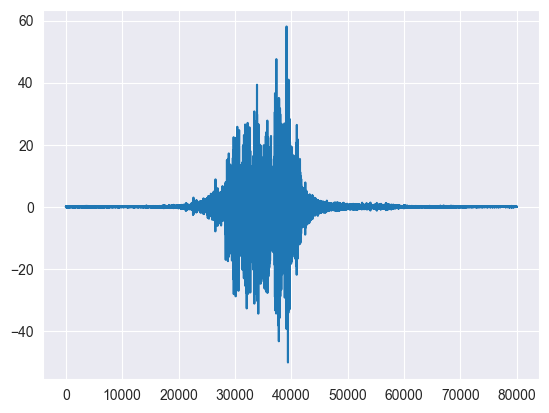

In [3]:
plt.plot(distance)
plt.imshow()

In [5]:
def fft_integral(f_min,f_max,acc,sf):

    Data = np.fft.fft(acc)
    N = len(Data)
    f = np.fft.fftfreq(N, 1 / sf)
    mask = (f >= f_min) & (f <= f_max)
    A_integral = np.zeros_like(Data, dtype=np.complex128)
    B_integral = np.zeros_like(Data, dtype=np.complex128)

    A_integral[mask] = Data[mask] / (2j * np.pi * f[mask])
    B_integral[mask] = A_integral[mask] / (2j * np.pi * f[mask])
    return B_integral

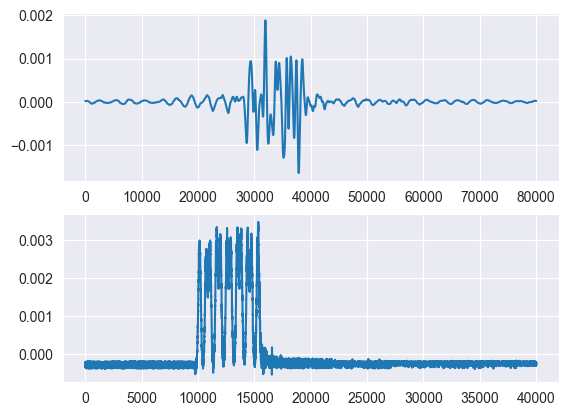

In [11]:
plt.subplot(211)
acc_intergral = fft_integral(0.75,5,acceleration,2000)
plt.plot(np.fft.ifft(acc_intergral).real)
plt.subplot(212)
plt.plot((displacement-np.mean(displacement))*0.001)
plt.show()

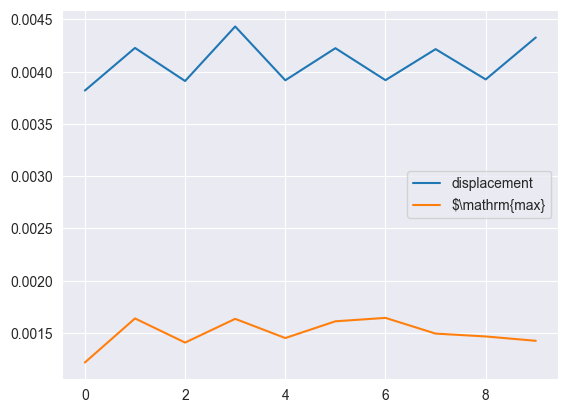

In [37]:
dir = 'D:\管片加速度积分\振动位移\宁波\963\download (38)/'
dir2 = 'D:\管片加速度积分\振动位移\宁波\963\download (37)/'
max_displacement = []
for files in os.listdir(dir):
    data = pd.read_csv(dir+files).iloc[:,0]
    handel_data = (data - np.mean(data[:1000]))*0.001
    max_dis = np.max(np.abs(handel_data))
    max_displacement.append(max_dis)
max_acc_register = []
for files2 in os.listdir(dir2):
    data2 = pd.read_csv(dir2+files2).iloc[:,0]
    handel_data2 = np.fft.ifft(fft_integral(0.75,5,data2,2000))
    max_acc_register.append(np.max(handel_data2)-np.min(handel_data2))

plt.plot(max_displacement,label = 'displacement')
plt.plot(max_acc_register,label = '$\mathrm{max}')
plt.legend()
plt.show()
    

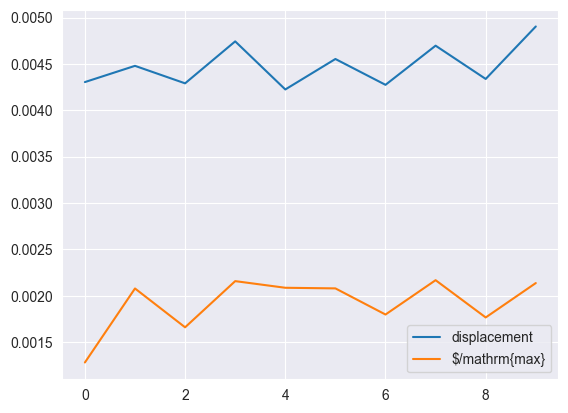

In [24]:
dir = 'D:\管片加速度积分\振动位移\宁波/1040/35/'
dir2 = 'D:\管片加速度积分\振动位移\宁波/1040/36/'
max_displacement = []
for files in os.listdir(dir):
    data = pd.read_csv(dir+files).iloc[:,0]
    handel_data = (data - np.mean(data[:1000]))*0.001
    max_dis = np.max(np.abs(handel_data))
    max_displacement.append(max_dis)
max_acc_register = []
for files2 in os.listdir(dir2):
    data2 = pd.read_csv(dir2+files2).iloc[:,0]
    handel_data2 = np.fft.ifft(fft_integral(0.65,5,data2,2000))
    max_acc_register.append(np.max(handel_data2)-np.min(handel_data2))

plt.plot(max_displacement,label = 'displacement')
plt.plot(max_acc_register,label = '$/mathrm{max}')
plt.legend()
plt.show()

E:\pythonProject1\venv\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


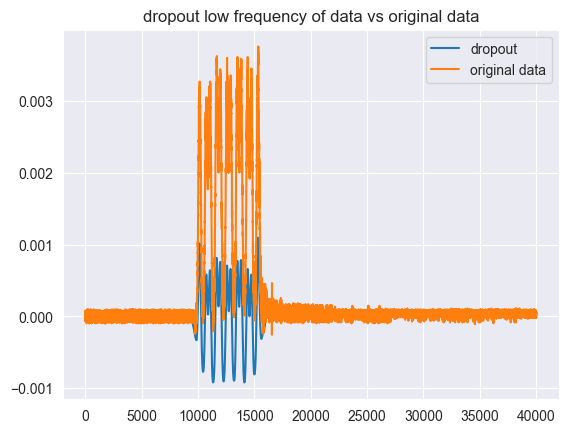

In [34]:
def dis_frequence(max_fs,min_fs,displacement,sf):
    fft_data = np.fft.fft(displacement)
    N = len(fft_data)
    f = np.fft.fftfreq(N, 1 / sf)
    mask = (f >= min_fs) & (f <= max_fs)
    A_integral = np.zeros_like(fft_data, dtype=np.complex128)
    A_integral[mask] = fft_data[mask] 
    return np.fft.ifft(A_integral)*0.001

plt.title('dropout low frequency of data vs original data')
plt.plot(dis_frequence(5,0.5,displacement,1000),label = 'dropout')
plt.plot(distance,label= 'original data')
plt.legend()
plt.show()
    

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

